# MLP vs CONVNET

In this homework, F_MNIST is used to compare MLP and CONVNET. 

##Cloning the repository and adding to out path.

In [45]:
!git clone https://github.com/Bduz/intro_pytorch.git                            

fatal: destination path 'intro_pytorch' already exists and is not an empty directory.


##Importing Libraries.

In [46]:
import sys
sys.path.insert(0, '/content/intro_pytorch/')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np
import time

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms

import helperfuncs

##Transforming, normalizing, downloading and loading the data.

In [47]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5), (0.5))])
# Download and load the training data
trainset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

##Epoch number to train the models.

In [48]:
epochs = 3

#MLP

##Building the MLP network.

In [49]:
class Network(nn.Module):
    def __init__(self, input_size, output_size, hidden_layers, drop_p=0.5):
        ''' Builds a feedforward network with arbitrary hidden layers.
        
            Arguments
            ---------
            input_size: integer, size of the input
            output_size: integer, size of the output layer
            hidden_layers: list of integers, the sizes of the hidden layers
            drop_p: float between 0 and 1, dropout probability
        '''
        super().__init__()
        # Add the first layer, input to a hidden layer
        self.hidden_layers = nn.ModuleList([nn.Linear(input_size, hidden_layers[0])])
        
        # Add a variable number of more hidden layers
        layer_sizes = zip(hidden_layers[:-1], hidden_layers[1:])
        self.hidden_layers.extend([nn.Linear(h1, h2) for h1, h2 in layer_sizes])
        
        self.output = nn.Linear(hidden_layers[-1], output_size)
        
        self.dropout = nn.Dropout(p=drop_p)
        
    def forward(self, x):
        ''' Forward pass through the network, returns the output logits '''
        
        # Forward through each layer in `hidden_layers`, with ReLU activation and dropout
        for linear in self.hidden_layers:
            x = F.relu(linear(x))
            x = self.dropout(x)
        
        x = self.output(x)
        
        return F.log_softmax(x, dim=1)

##Training the MLP Network.


In [62]:
# Create the network, define the criterion and optimizer
model = Network(784, 10, [516, 256], drop_p=0.5)
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Implement a function for the validation pass
def validation(model, testloader, criterion):
    test_loss = 0
    accuracy = 0
    for images, labels in testloader:

        images.resize_(images.shape[0], 784)

        output = model.forward(images)
        test_loss += criterion(output, labels).item()

        ps = torch.exp(output)
        equality = (labels.data == ps.max(dim=1)[1])
        accuracy += equality.type(torch.FloatTensor).mean()
    
    return test_loss, accuracy

steps = 0
running_loss = 0
print_every = 40
testval = np.zeros((1,4))                                                        #Added code
i = 0                                                                            #Added code
for e in range(epochs):
    model.train()
    for images, labels in trainloader:
        steps += 1
        
        # Flatten images into a 784 long vector
        images.resize_(images.size()[0], 784)
        
        optimizer.zero_grad()
        
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        if steps % print_every == 0:
            # Make sure network is in eval mode for inference
            model.eval()
            
            # Turn off gradients for validation, saves memory and computations
            with torch.no_grad():
                test_loss, accuracy = validation(model, testloader, criterion)
                
            print("Steps: {:.2f}" .format((steps/40)-1),                         #Added code 
                  "Epoch: {}/{}.. ".format(e+1, epochs),
                  "Training Loss: {:.3f}.. ".format(running_loss/print_every),
                  "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
                  "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))
            teststeps = int((steps/40)-1)                                        #Added code
            trainingloss = running_loss/print_every                              #Added code
            testloss = test_loss/len(testloader)                                 #Added code
            testacc = float(accuracy/len(testloader))                            #Added code
            newrow = [teststeps, trainingloss, testloss, testacc]                #Added code
            testval = np.vstack((testval, newrow))                               #Added code
            if i == 0:                                                           #Added code
              testval = np.delete(testval, 0,0)                                  #Added code
              i = 1;                                                             #Added code
            running_loss = 0
            # Make sure training is back on
            model.train()

teststeps = testval[:,0]                                                         #Added code
trainingloss = testval[:,1]                                                      #Added code
testloss = testval[:,2]                                                          #Added code
testacc = testval[:,3]                                                           #Added code

Steps: 0.00 Epoch: 1/3..  Training Loss: 1.301..  Test Loss: 0.773..  Test Accuracy: 0.721
Steps: 1.00 Epoch: 1/3..  Training Loss: 0.809..  Test Loss: 0.649..  Test Accuracy: 0.744
Steps: 2.00 Epoch: 1/3..  Training Loss: 0.709..  Test Loss: 0.635..  Test Accuracy: 0.751
Steps: 3.00 Epoch: 1/3..  Training Loss: 0.693..  Test Loss: 0.593..  Test Accuracy: 0.765
Steps: 4.00 Epoch: 1/3..  Training Loss: 0.660..  Test Loss: 0.561..  Test Accuracy: 0.792
Steps: 5.00 Epoch: 1/3..  Training Loss: 0.655..  Test Loss: 0.548..  Test Accuracy: 0.797
Steps: 6.00 Epoch: 1/3..  Training Loss: 0.605..  Test Loss: 0.528..  Test Accuracy: 0.805
Steps: 7.00 Epoch: 1/3..  Training Loss: 0.580..  Test Loss: 0.529..  Test Accuracy: 0.809
Steps: 8.00 Epoch: 1/3..  Training Loss: 0.598..  Test Loss: 0.507..  Test Accuracy: 0.810
Steps: 9.00 Epoch: 1/3..  Training Loss: 0.581..  Test Loss: 0.498..  Test Accuracy: 0.815
Steps: 10.00 Epoch: 1/3..  Training Loss: 0.571..  Test Loss: 0.499..  Test Accuracy: 0.81

##Plotting Training Loss, Test Loss and Test Accuracy for MLP.


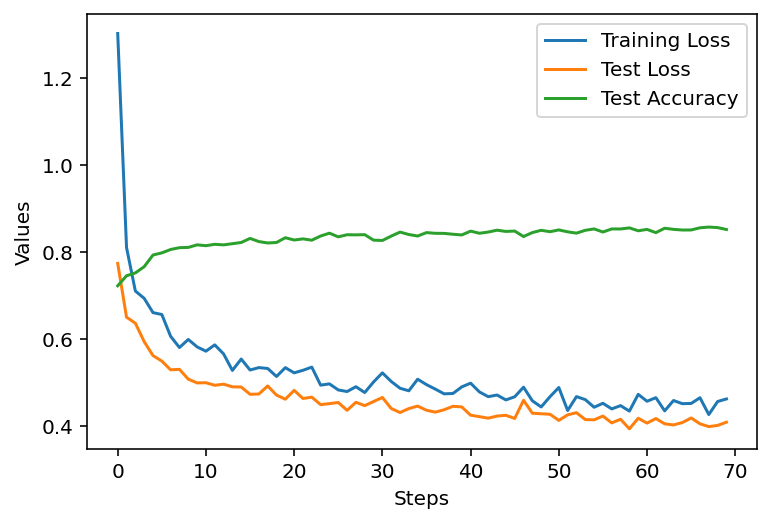

In [63]:
fig = plt.figure()                                                               #Added code
ax1 = fig.add_subplot(111)                                                       #Added code
ax1.plot(teststeps, trainingloss, label="Training Loss")                         #Added code
ax1.plot(teststeps, testloss, label="Test Loss")                                 #Added code
ax1.plot(teststeps, testacc, label="Test Accuracy")                              #Added code
plt.legend(loc = "upper right")                                                  #Added code
plt.xlabel('Steps')                                                              #Added code
plt.ylabel('Values')                                                             #Added code
plt.show()  

##Analyze the Results for MLP.


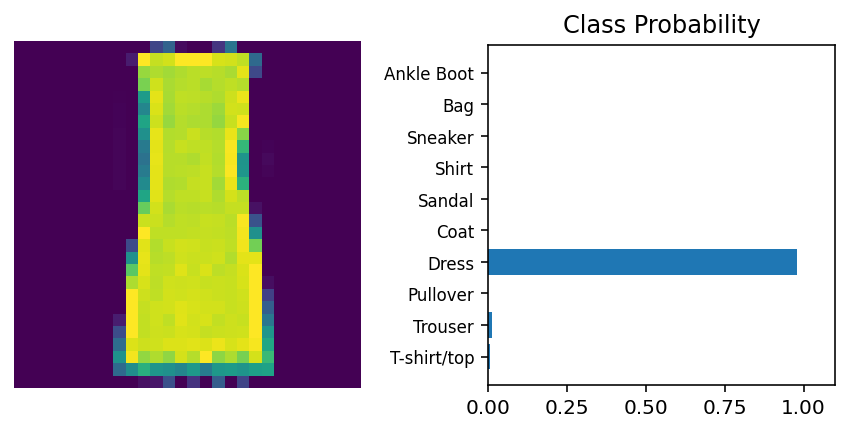

In [66]:
# Test out your network!

model.eval()

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.view(1, 784)

# Calculate the class probabilities (softmax) for img
with torch.no_grad():
    output = model.forward(img)

ps = torch.exp(output)

# Plot the image and probabilities
helperfuncs.view_classify(img.view(1, 28, 28), ps, version='Fashion')

#CONVNET

##Building the CONVNET.

In [67]:
class MnistModel(nn.Module):
  def __init__(self):
    super().__init__()
    # 1 input image channel, 6 output channels, 5x5 square convolution
    # kernel
    self.conv1 = nn.Conv2d(1, 6, 5, padding=2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    # an affine operation: y = Wx + b
    self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 5*5 from image dimension
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
      # Max pooling over a (2, 2) window
      x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
      # If the size is a square, you can specify with a single number
      x = F.max_pool2d(F.relu(self.conv2(x)), 2)
      x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
      x = F.relu(self.fc1(x))
      x = F.relu(self.fc2(x))
      x = self.fc3(x)
      return x


model = MnistModel()
model

MnistModel(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

##Training the CONVNET.

In [68]:
# Implement a function for the validation pass
def validation(model, testloader, criterion):
    test_loss = 0
    accuracy = 0
    for images, labels in testloader:

        output = model.forward(images)
        test_loss += criterion(output, labels).item()

        ps = torch.exp(output)
        equality = (labels.data == ps.max(dim=1)[1])
        accuracy += equality.type(torch.FloatTensor).mean()
    
    return test_loss, accuracy

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

print_every = 40
testval = np.zeros((1,4))                                                        #Added code
i = 0                                                                            #Added code
steps = 0
for e in range(epochs):
  running_loss = 0
  for images, labels in iter(trainloader):
    steps += 1

    optimizer.zero_grad()

    output = model.forward(images)
    loss = criterion(output, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()

    if steps % print_every == 0:
      # Make sure network is in eval mode for inference
      model.eval()
      
      # Turn off gradients for validation, saves memory and computations
      with torch.no_grad():
          test_loss, accuracy = validation(model, testloader, criterion)
          
      print("Steps: {:.2f}" .format((steps/40)-1),
            "Epoch: {}/{}.. ".format(e+1, epochs),
            "Training Loss: {:.3f}.. ".format(running_loss/print_every),
            "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
            "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))
      teststeps = int((steps/40)-1)                                        #Added code
      trainingloss = running_loss/print_every                              #Added code
      testloss = test_loss/len(testloader)                                 #Added code
      testacc = float(accuracy/len(testloader))                            #Added code
      newrow = [teststeps, trainingloss, testloss, testacc]                #Added code
      testval = np.vstack((testval, newrow))                               #Added code
      if i == 0:                                                           #Added code
        testval = np.delete(testval, 0,0)                                  #Added code
        i = 1;                                                             #Added code
      running_loss = 0
      
      # Make sure training is back on
      model.train()

teststeps = testval[:,0]                                                         #Added code
trainingloss = testval[:,1]                                                      #Added code
testloss = testval[:,2]                                                          #Added code
testacc = testval[:,3]                                                           #Added code

Steps: 0.00 Epoch: 1/3..  Training Loss: 2.299..  Test Loss: 2.296..  Test Accuracy: 0.099
Steps: 1.00 Epoch: 1/3..  Training Loss: 2.295..  Test Loss: 2.290..  Test Accuracy: 0.105
Steps: 2.00 Epoch: 1/3..  Training Loss: 2.287..  Test Loss: 2.282..  Test Accuracy: 0.156
Steps: 3.00 Epoch: 1/3..  Training Loss: 2.278..  Test Loss: 2.272..  Test Accuracy: 0.197
Steps: 4.00 Epoch: 1/3..  Training Loss: 2.267..  Test Loss: 2.259..  Test Accuracy: 0.306
Steps: 5.00 Epoch: 1/3..  Training Loss: 2.249..  Test Loss: 2.238..  Test Accuracy: 0.402
Steps: 6.00 Epoch: 1/3..  Training Loss: 2.224..  Test Loss: 2.203..  Test Accuracy: 0.473
Steps: 7.00 Epoch: 1/3..  Training Loss: 2.173..  Test Loss: 2.131..  Test Accuracy: 0.460
Steps: 8.00 Epoch: 1/3..  Training Loss: 2.064..  Test Loss: 1.978..  Test Accuracy: 0.390
Steps: 9.00 Epoch: 1/3..  Training Loss: 1.839..  Test Loss: 1.691..  Test Accuracy: 0.447
Steps: 10.00 Epoch: 1/3..  Training Loss: 1.544..  Test Loss: 1.385..  Test Accuracy: 0.55

##Plotting Training Loss, Test Loss and Test Accuracy for CONVNET.

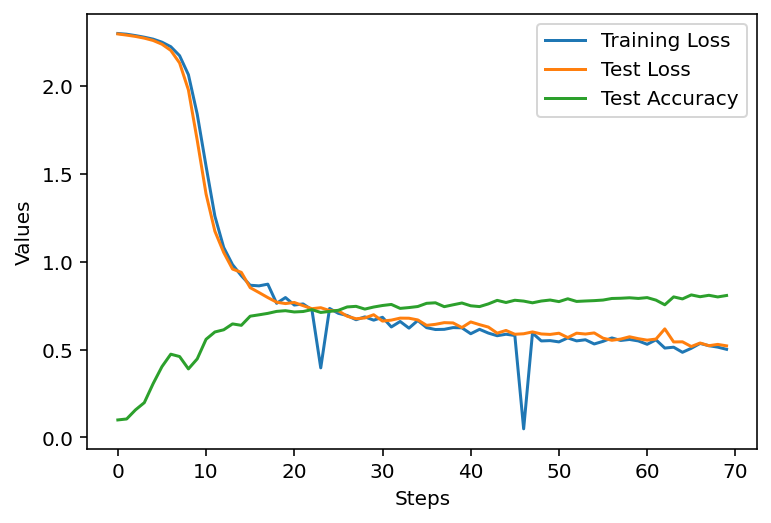

In [69]:
fig = plt.figure()                                                               #Added code
ax1 = fig.add_subplot(111)                                                       #Added code
ax1.plot(teststeps, trainingloss, label="Training Loss")                         #Added code
ax1.plot(teststeps, testloss, label="Test Loss")                                 #Added code
ax1.plot(teststeps, testacc, label="Test Accuracy")                              #Added code
plt.legend(loc = "upper right")                                                  #Added code
plt.xlabel('Steps')                                                              #Added code
plt.ylabel('Values')                                                             #Added code
plt.show()  

##Analyze the Results for CONVNET.

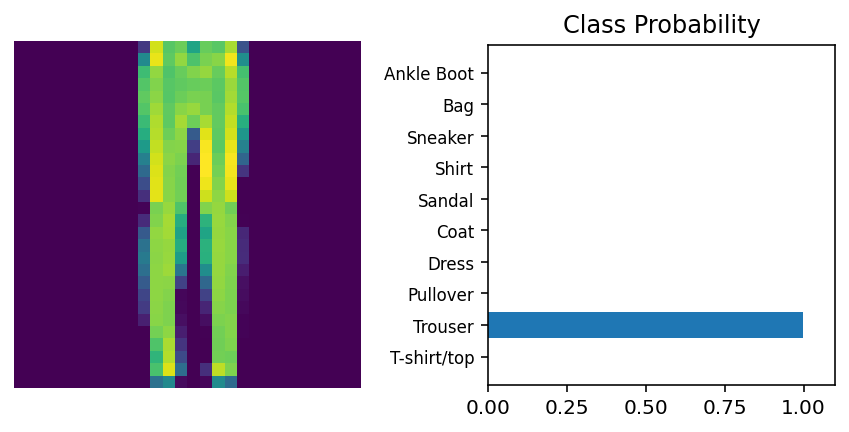

In [70]:
images, labels = next(iter(testloader))

with torch.no_grad():
  logits = model.forward(images)

ps = F.softmax(logits, dim=1)

index = 20
helperfuncs.view_classify(images[index], ps[index], version='Fashion')